# Muhammad Rafif - 2440057741 - no 1

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from zipfile import ZipFile 
import keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

C:\Users\muham\anaconda3\envs\theia_da\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\muham\anaconda3\envs\theia_da\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\muham\anaconda3\envs\theia_da\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print("Train set:  ", len(os.listdir("Training_Data")))
print("Train masks:", len(os.listdir("Training_GroundTruth")))

Train set:   900
Train masks: 900


Im Using U
Net Model for this exam because U-Net are :

**End-to-end architecture**: UNet is an end-to-end deep learning architecture that can be trained on large datasets, providing a fast and efficient way to perform image segmentation.

**U-shaped structure**: The U-shaped structure of the UNet architecture allows for high-level feature extraction from the contracting path and precise localization in the expansive path.

**Skip connections**: UNet uses skip connections that concatenate feature maps from the contracting path to the expansive path, allowing the network to leverage lower-level features for detailed segmentation.

**Transfer learning**: Pre-trained UNet models on large datasets can be fine-tuned on smaller datasets for various medical imaging tasks, reducing the amount of annotated data required.

**Good performance on medical images**: UNet has shown good performance on medical image segmentation tasks, making it a popular choice in the field of medical image analysis.

**First**
creating a DataFrame to store the file paths of the images in a directory named 'Training_Data'. Uses the os module to walk through the directory, get the filenames, and extract the id of the image from the filename. The 'skin_id' is obtained by splitting the filename by the '.' character and taking the first part of the result. The 'skin_id' and file path are then stored in a dictionary and this dictionary is used to create a pandas DataFrame. The index of the DataFrame is set to 'id' column.

In [3]:
# First is define the location of the training and test dataset
skin_ids = []
paths = []
for dirname, _, filenames in os.walk('Training_Data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)    
        paths.append(path)
        
        skin_id = filename.split(".")[0]
        skin_ids.append(skin_id)

d = {"id": skin_ids, "skin_path": paths}
df = pd.DataFrame(data = d)
df = df.set_index('id')
df

skin_path
id                                          
ISIC_0000000  Training_Data\ISIC_0000000.jpg
ISIC_0000001  Training_Data\ISIC_0000001.jpg
ISIC_0000002  Training_Data\ISIC_0000002.jpg
ISIC_0000004  Training_Data\ISIC_0000004.jpg
ISIC_0000006  Training_Data\ISIC_0000006.jpg
...                                      ...
ISIC_0011393  Training_Data\ISIC_0011393.jpg
ISIC_0011397  Training_Data\ISIC_0011397.jpg
ISIC_0011398  Training_Data\ISIC_0011398.jpg
ISIC_0011400  Training_Data\ISIC_0011400.jpg
ISIC_0011402  Training_Data\ISIC_0011402.jpg

[900 rows x 1 columns]

In [4]:
skin_ids = []
gt_path = []
for dirname, _, filenames in os.walk('Training_GroundTruth'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        gt_path.append(path)
        
        skin_id = filename.split(".")[0]
        skin_id = skin_id.split("_Segmentation")[0]
        skin_ids.append(skin_id)

        
d = {"id": skin_ids,"gt_path": gt_path}
gt_df = pd.DataFrame(data = d)
gt_df = gt_df.set_index('id')
gt_df

gt_path
id                                                             
ISIC_0000000  Training_GroundTruth\ISIC_0000000_Segmentation...
ISIC_0000001  Training_GroundTruth\ISIC_0000001_Segmentation...
ISIC_0000002  Training_GroundTruth\ISIC_0000002_Segmentation...
ISIC_0000004  Training_GroundTruth\ISIC_0000004_Segmentation...
ISIC_0000006  Training_GroundTruth\ISIC_0000006_Segmentation...
...                                                         ...
ISIC_0011393  Training_GroundTruth\ISIC_0011393_Segmentation...
ISIC_0011397  Training_GroundTruth\ISIC_0011397_Segmentation...
ISIC_0011398  Training_GroundTruth\ISIC_0011398_Segmentation...
ISIC_0011400  Training_GroundTruth\ISIC_0011400_Segmentation...
ISIC_0011402  Training_GroundTruth\ISIC_0011402_Segmentation...

[900 rows x 1 columns]

In [5]:
#merge the dataset
df["gt_path"] = gt_df["gt_path"]
df

skin_path  \
id                                             
ISIC_0000000  Training_Data\ISIC_0000000.jpg   
ISIC_0000001  Training_Data\ISIC_0000001.jpg   
ISIC_0000002  Training_Data\ISIC_0000002.jpg   
ISIC_0000004  Training_Data\ISIC_0000004.jpg   
ISIC_0000006  Training_Data\ISIC_0000006.jpg   
...                                      ...   
ISIC_0011393  Training_Data\ISIC_0011393.jpg   
ISIC_0011397  Training_Data\ISIC_0011397.jpg   
ISIC_0011398  Training_Data\ISIC_0011398.jpg   
ISIC_0011400  Training_Data\ISIC_0011400.jpg   
ISIC_0011402  Training_Data\ISIC_0011402.jpg   

                                                        gt_path  
id                                                               
ISIC_0000000  Training_GroundTruth\ISIC_0000000_Segmentation...  
ISIC_0000001  Training_GroundTruth\ISIC_0000001_Segmentation...  
ISIC_0000002  Training_GroundTruth\ISIC_0000002_Segmentation...  
ISIC_0000004  Training_GroundTruth\ISIC_0000004_Segmentation...  
ISIC_0000006  Training_GroundTruth\ISIC_0000006_Segmentation...  
...                                                         ...  
ISIC_0011393  Training_GroundTruth\ISIC_0011393_Segmentation...  
ISIC_0011397  Training_GroundTruth\ISIC_0011397_Segmentation...  
ISIC_0011398  Training_GroundTruth\ISIC_0011398_Segmentation...  
ISIC_0011400  Training_GroundTruth\ISIC_0011400_Segmentation...  
ISIC_0011402  Training_GroundTruth\ISIC_0011402_Segmentation...  

[900 rows x 2 columns]

This code defines two functions data_augmentation and preprocessing to process skin and ground truth (GT) images.
The data_augmentation function takes as input a skin image and a GT image. If a random number generated using tf.random.uniform is greater than 0.5, the function flips the skin and GT images horizontally using tf.image.flip_left_right. The function returns the processed skin and GT images.

The preprocessing function takes as input the paths to the skin and GT images. It reads the images using tf.io.read_file, decodes the JPEG format to get the image data using tf.image.decode_jpeg, resizes the images to a specified size of [256, 256] using tf.image.resize, and scales the pixel values of the skin image to between 0 and 1 by dividing the values by 255.0. The function converts the GT image to binary values of -1 and 1 using the sign function tf.math.sign. The final output of the function is the processed skin and GT images.

then create dataset generates a dataset from the provided dataframe (df) and performs the preprocessing procedures required. The output dataset is returned. If the train flag is set to True, the data is also supplemented before being returned by the data augmentation function.

The dataset is generated by calling the from tensor slices method, which generates a dataset from a tensor. The method reads the values from the dataframe's "skin path" and "gt path" columns and generates a dataset from them.

The generated dataset is then mapped via the preprocessing function, which performs the preparation processes listed below on each element in the dataset:
Read the skin image file and decode it as a JPEG image.
Resize the image to the desired dimensions (256 x 256)
Divide the image by 255.0 to convert it to a float type with values between 0 and 1.
Repeat the process with the ground truth image, but only keep the first channel.
Using the sign approach, convert the image to binary.
If the train flag is set to True, the dataset is also mapped through the data augmentation function, which flips the skin and ground truth pictures left-right at random.
Returns the final preprocessed and enhanced dataset.


In [6]:
#perform a simple augmentation of flipping an image and then normalize the image pixel in between 0 and 1
img_size = [256,256]

def data_augmentation(skin_img, gt_img):

    if tf.random.uniform(()) > 0.5:
        skin_img = tf.image.flip_left_right(skin_img)
        gt_img = tf.image.flip_left_right(gt_img)

    return skin_img, gt_img

def preprocessing(skin_path, gt_path):
    skin_img = tf.io.read_file(skin_path) 
    skin_img = tf.image.decode_jpeg(skin_img, channels=3)
    skin_img = tf.image.resize(skin_img, img_size)
    skin_img = tf.cast(skin_img, tf.float32) / 255.0
    
    gt_img = tf.io.read_file(gt_path)
    gt_img = tf.image.decode_jpeg(gt_img, channels=3)
    gt_img = tf.image.resize(gt_img, img_size)
    gt_img = gt_img[:,:,:1]    
    gt_img = tf.math.sign(gt_img)
    
    
    return skin_img, gt_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["skin_path"].values, df["gt_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["skin_path"].values, df["gt_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        ds = ds.map(data_augmentation, tf.data.AUTOTUNE)

    return ds

The code divides the original data frame 'df' into two new data frames called 'train df' and 'valid df'. The data for training the model is stored in 'train df,' while the data for validation is stored in 'valid df. The function 'create dataset' is used to generate a TensorFlow dataset from a data frame and preprocess it.

The function is called with the input 'train=True' for the training data, which performs data augmentation in addition to preprocessing. To avoid overfitting, the training dataset is scrambled and repeated. The 'TRAIN LENGTH' variable stores the length of the training dataset.

The batch size is set to 16, and the shuffle buffer size is set to 1000. The 'prefetch' method is used to boost performance by allowing the GPU to process numerous batches concurrently with the CPU.

The validation dataset is also batched after being treated with the preprocessing tool.



In [7]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.25)
train = create_dataset(train_df, train = True)
valid = create_dataset(valid_df)

In [8]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [9]:
#split the dataset into train and test
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)


This function creates a plot of images that are passed to it in display_list. It sets the figure size to (15,15) and creates 3 subplots with titles 'Input Image', 'True Mask', and 'Predicted Mask'. It displays each image in the display_list in a corresponding subplot, converting it from a tensor to a image using tf.keras.preprocessing.image.array_to_img. Finally, it turns off the axis for each subplot before displaying the plot.


In [10]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

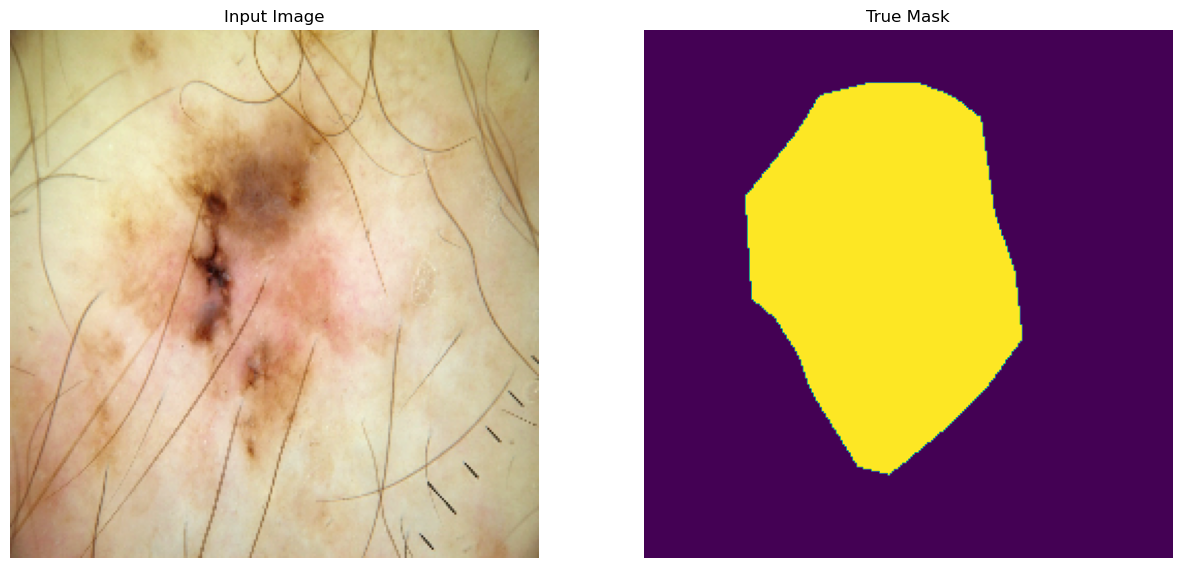

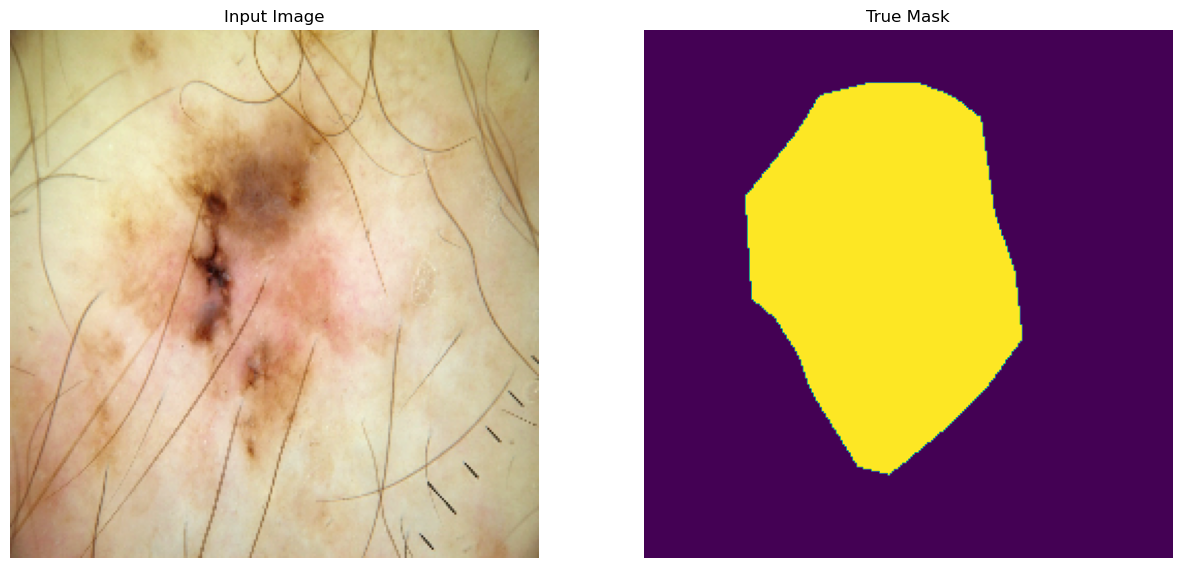

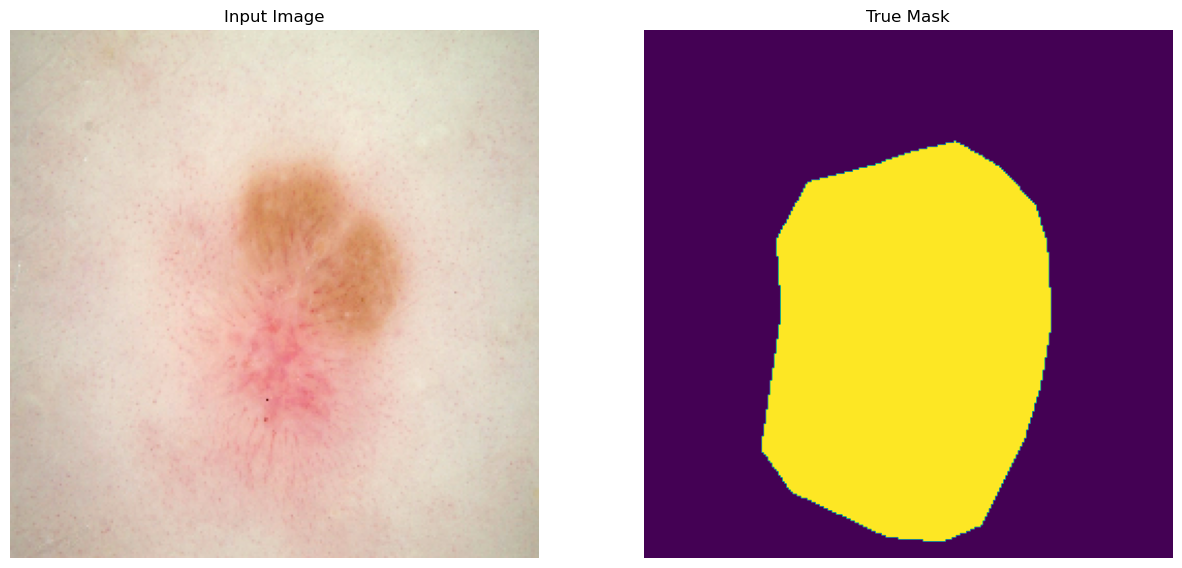

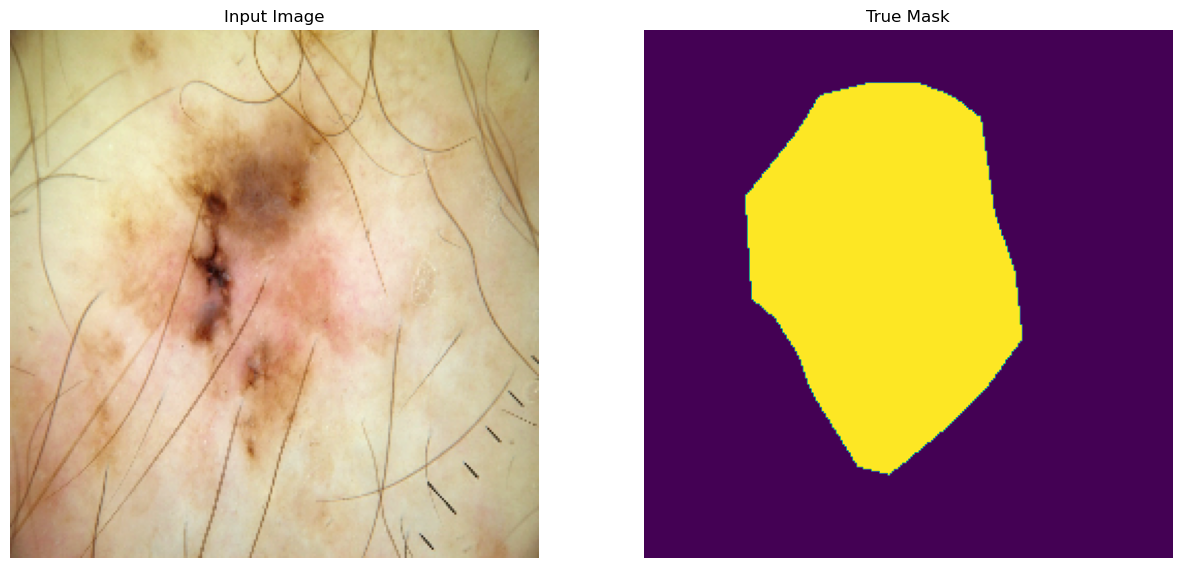

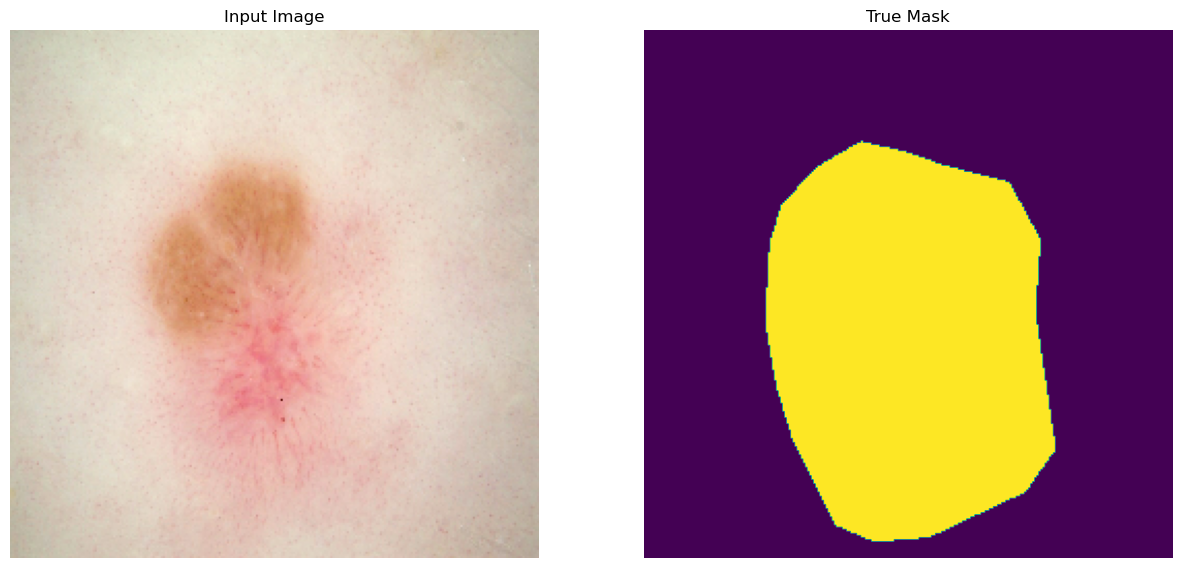

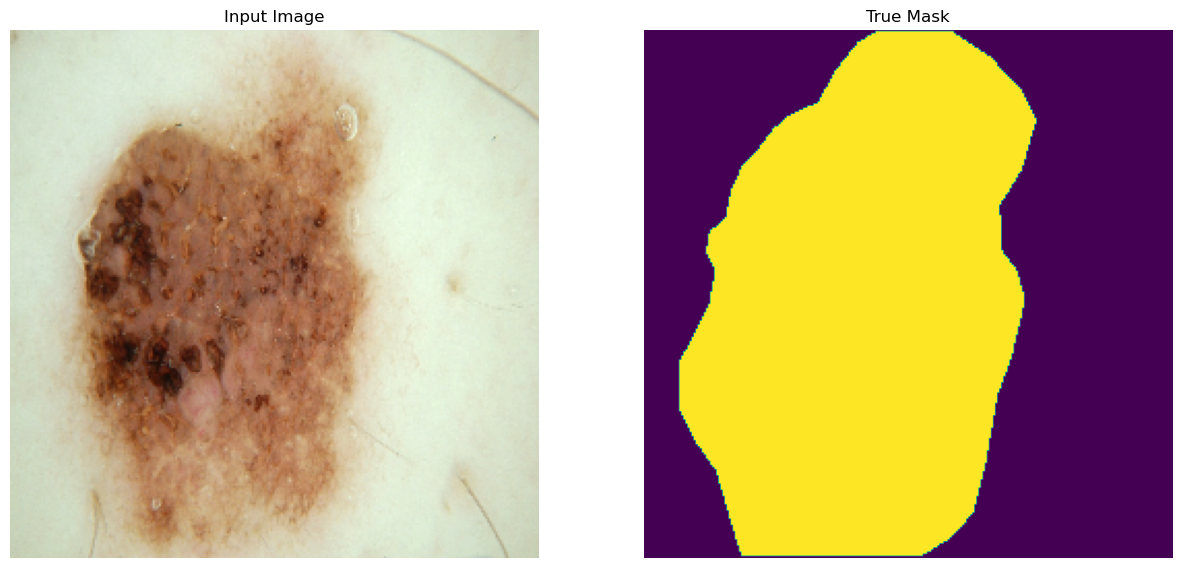

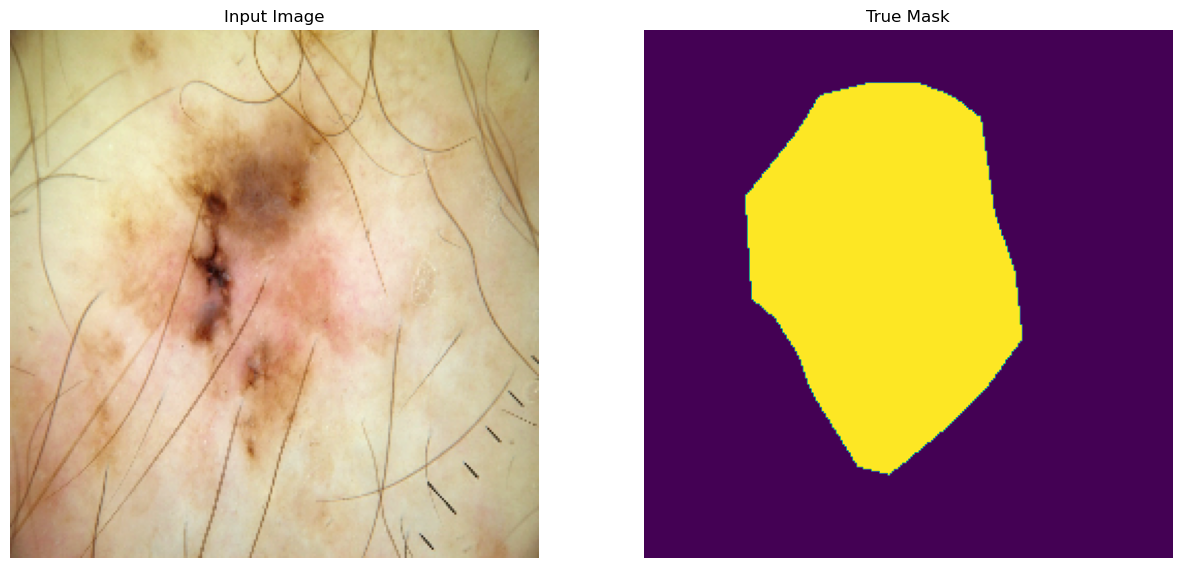

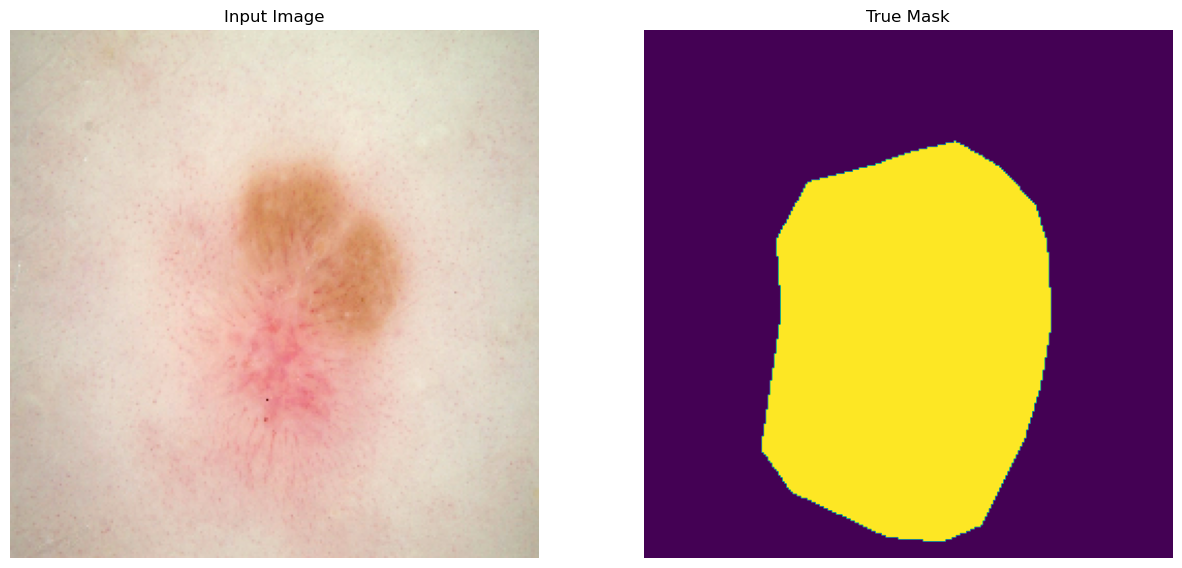

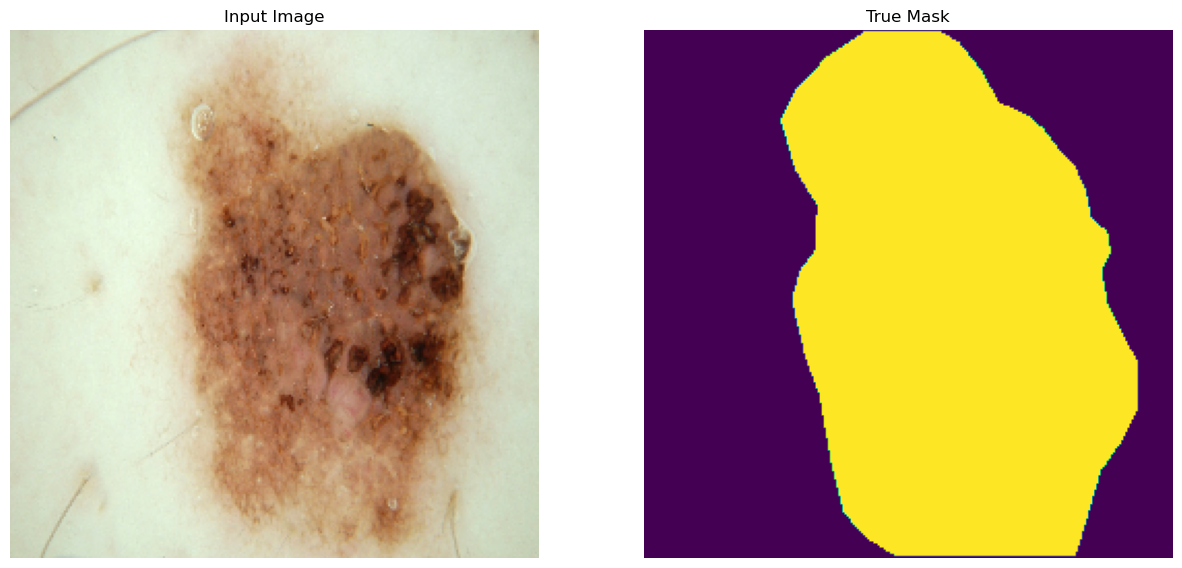

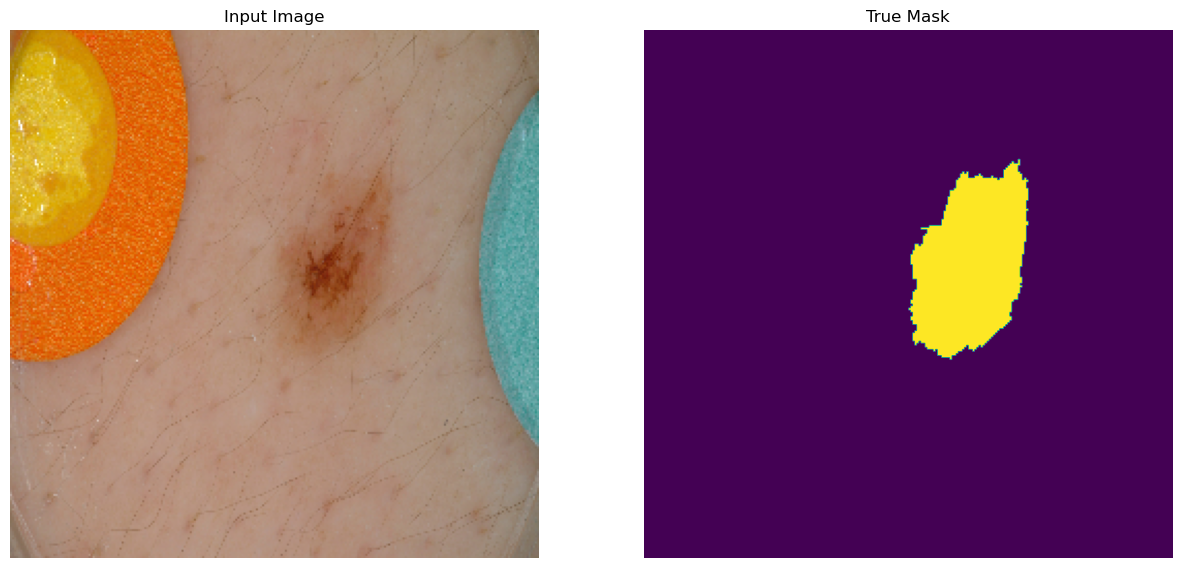

In [11]:
for i in range(5):
   for image, mask in train.take(i):
        sample_image, sample_mask = image, mask
        display([sample_image, sample_mask])

base_model defines a feature extraction model using MobileNetV2 as the base model. The base model is pre-trained on the ImageNet dataset and has been fine-tuned for image classification tasks. The feature extraction model takes the input of the base model and uses the outputs of five specific layers (block_1_expand_relu, block_3_expand_relu, block_6_expand_relu, block_13_expand_relu, and block_16_project) as its outputs. The trainable property of the feature extraction model is set to False, meaning that the model's weights will not be updated during training.

In [12]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[256, 256, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False

Upsample function is defining the architecture for an upsampling layer of a Convolutional Neural Network (CNN).

The function takes 4 arguments:

filters: the number of filters in the layer
size: the size of the filters
norm_type: the type of normalization to be applied, either 'batchnorm' or 'instancenorm'
apply_dropout: a flag indicating whether dropout should be applied to this layer
The architecture of the upsampling layer is implemented as a Sequential model consisting of:

A Conv2DTranspose layer with the specified number of filters, filter size and stride, with padding set to 'same'. The kernel_initializer is set to a random normal initializer with mean 0 and standard deviation 0.02. Bias is not used.
A normalization layer either a BatchNormalization layer or an InstanceNormalization layer, depending on the specified normalization type.
A Dropout layer with rate 0.5, if apply_dropout is True.
A ReLU activation layer.
Finally, the Sequential model is returned.


In [13]:
def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]

This code is defining an implementation of the U-Net architecture for image segmentation.

The unet_model function takes an output_channels argument and returns a tf.keras.Model object with the U-Net architecture. It starts by defining an input layer with the shape of [256, 256, 3]. The down_stack function is then used to downsample the input image through the model. The output of the down-sampling operation, stored in the x variable, is then concatenated with the output of the reverse of the skips list. This reverse list is created by taking all elements of the skips list except the last one and reversing the order. This process is repeated using the up_stack list. Finally, the last layer is a transposed convolutional layer that upsamples the input image to the final desired resolution, with the number of channels equal to output_channels, and uses a sigmoid activation function.

In [58]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

# **Train The Model**

The dice_coef function calculates the Dice coefficient, which is used as a similarity metric between the ground truth image and the predicted image. The dice_loss function returns 1 minus the Dice coefficient.

The model is then compiled using the Adam optimizer, dice_loss as the loss function, and the Dice coefficient, binary accuracy, as metrics.

The final line plots the model architecture using the tf.keras.utils.plot_model function.


In [59]:
#compile the model and see the model architecture
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])b

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.



This code is used to display the input image, ground truth mask, and predicted mask using Matplotlib. The show_predictions function takes a sample image and its corresponding mask, and it uses the trained model to predict the mask. The model.predict method is used to generate the predicted mask, and the visualize function is used to display the images in a subplot format. The tf.keras.preprocessing.image.array_to_img method is used to convert the tensors to images for display purposes.


1/1 [==============================] - 1s 657ms/step


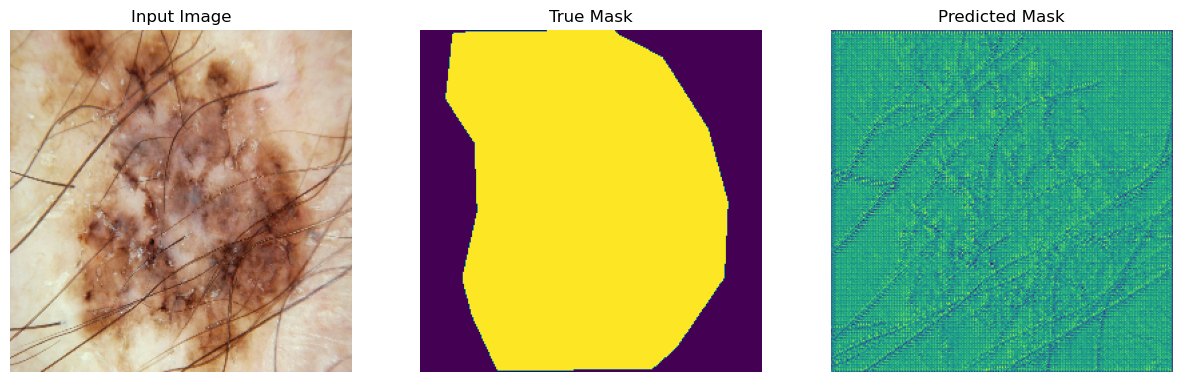

In [16]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 128, 128, 9  1841984     ['input_2[0][0]']                
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                         

Epoch 1/15
42/42 [==============================] - 48s 1s/step - loss: 0.3521 - dice_coef: 0.6479 - binary_accuracy: 0.8009 - val_loss: 0.3192 - val_dice_coef: 0.6989 - val_binary_accuracy: 0.8173
Epoch 2/15
1/1 [==============================] - 0s 67ms/step


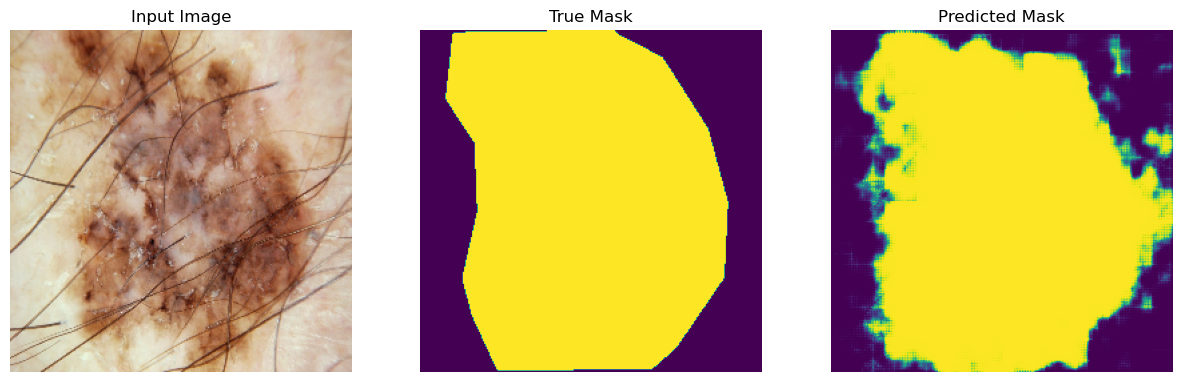

Epoch 3/15
42/42 [==============================] - 47s 1s/step - loss: 0.1658 - dice_coef: 0.8334 - binary_accuracy: 0.9217 - val_loss: 0.1690 - val_dice_coef: 0.8362 - val_binary_accuracy: 0.9212
Epoch 4/15
42/42 [==============================] - 47s 1s/step - loss: 0.1576 - dice_coef: 0.8416 - binary_accuracy: 0.9239 - val_loss: 0.1532 - val_dice_coef: 0.8510 - val_binary_accuracy: 0.9281
Epoch 5/15
1/1 [==============================] - 0s 60ms/step


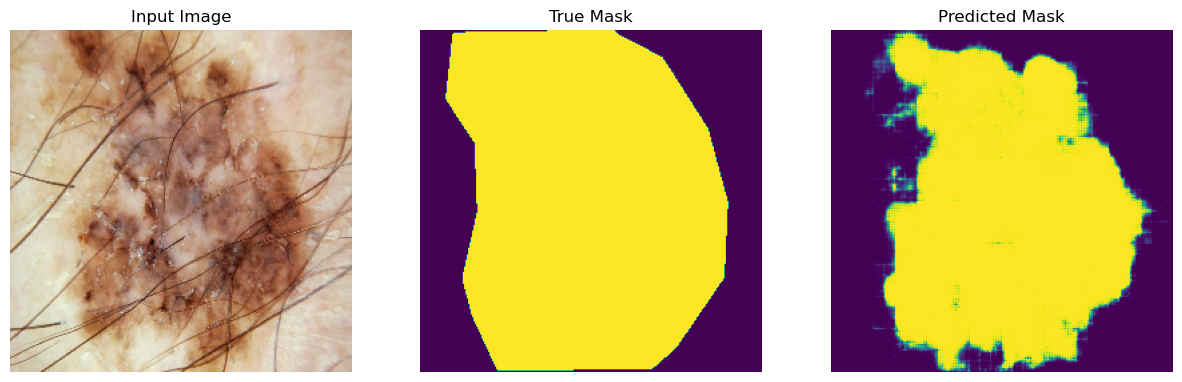

Epoch 6/15
42/42 [==============================] - 46s 1s/step - loss: 0.1418 - dice_coef: 0.8582 - binary_accuracy: 0.9304 - val_loss: 0.1735 - val_dice_coef: 0.8314 - val_binary_accuracy: 0.9207
Epoch 7/15
42/42 [==============================] - 45s 1s/step - loss: 0.1445 - dice_coef: 0.8544 - binary_accuracy: 0.9311 - val_loss: 0.1534 - val_dice_coef: 0.8474 - val_binary_accuracy: 0.9248
Epoch 8/15
1/1 [==============================] - 0s 54ms/step


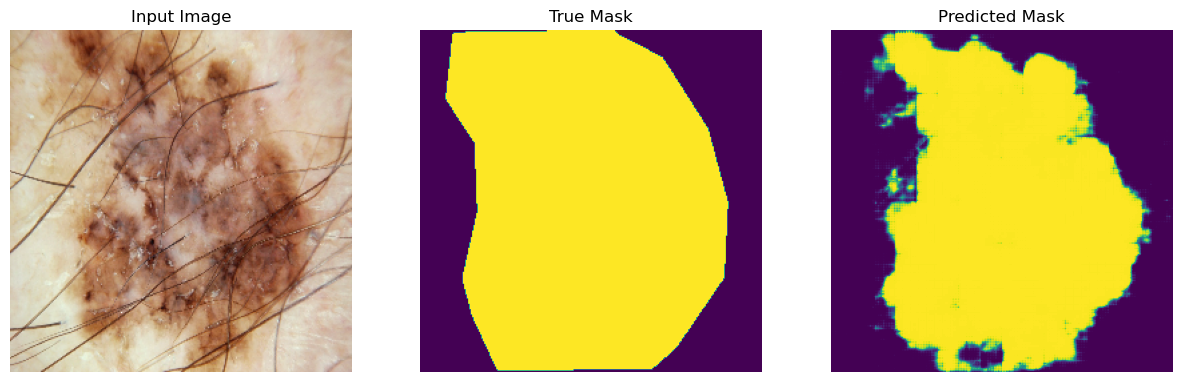

Epoch 9/15
42/42 [==============================] - 47s 1s/step - loss: 0.1352 - dice_coef: 0.8638 - binary_accuracy: 0.9308 - val_loss: 0.1517 - val_dice_coef: 0.8526 - val_binary_accuracy: 0.9292
Epoch 10/15
42/42 [==============================] - 48s 1s/step - loss: 0.1352 - dice_coef: 0.8611 - binary_accuracy: 0.9319 - val_loss: 0.1473 - val_dice_coef: 0.8554 - val_binary_accuracy: 0.9299
Epoch 11/15
1/1 [==============================] - 0s 63ms/step


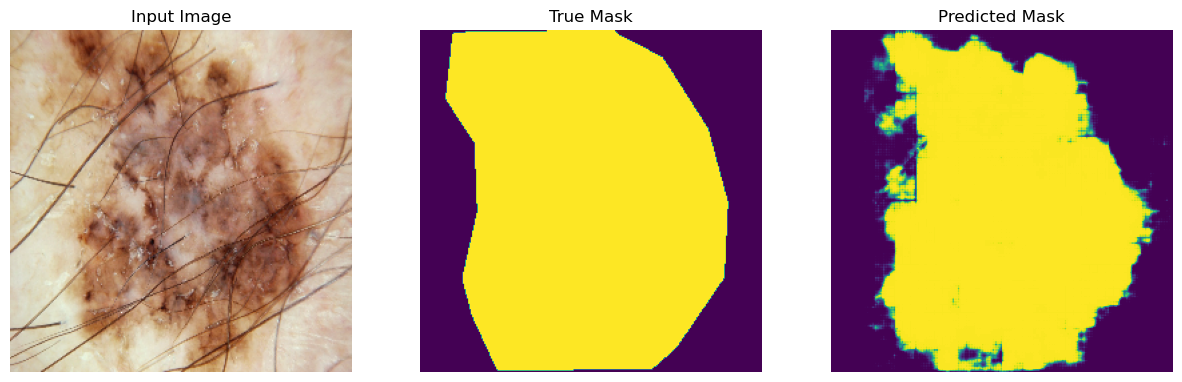

Epoch 12/15
42/42 [==============================] - 47s 1s/step - loss: 0.1329 - dice_coef: 0.8644 - binary_accuracy: 0.9337 - val_loss: 0.1414 - val_dice_coef: 0.8600 - val_binary_accuracy: 0.9305
Epoch 13/15
42/42 [==============================] - 47s 1s/step - loss: 0.1263 - dice_coef: 0.8734 - binary_accuracy: 0.9337 - val_loss: 0.1409 - val_dice_coef: 0.8601 - val_binary_accuracy: 0.9302
Epoch 14/15
1/1 [==============================] - 0s 53ms/step


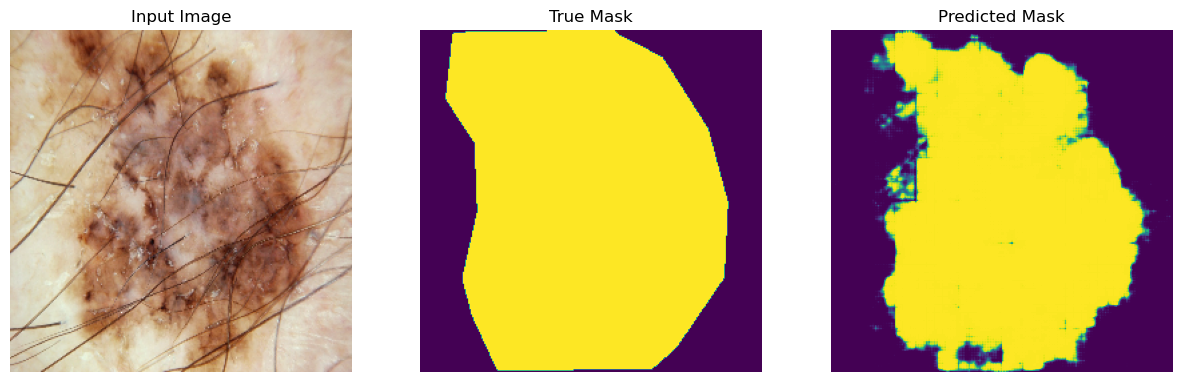

Epoch 15/15
42/42 [==============================] - 47s 1s/step - loss: 0.1255 - dice_coef: 0.8753 - binary_accuracy: 0.9332 - val_loss: 0.1423 - val_dice_coef: 0.8597 - val_binary_accuracy: 0.9314


In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

# Using Soft-Attention

This code defines two functions channel_attention and upsample that are used to create an upsampling layer in a deep learning model.

The channel_attention function takes inputs, channel_axis, and reduction_ratio as inputs and returns an attention mechanism applied to the channels. The GlobalAveragePooling2D layer is used to average all values in each channel, and then two dense layers with relu and sigmoid activation functions are used to learn the weights for each channel. The final step is to multiply each channel by its learned weights, which is done with the Multiply layer.

The upsample function takes filters, size, norm_type, and apply_dropout as inputs and returns a sequential model that performs upsampling. The model starts with a Conv2DTranspose layer that increases the size of the feature map, followed by a normalization layer (either BatchNormalization or InstanceNormalization), the channel_attention function, and finally an optional dropout layer to prevent overfitting. The upsampled feature map is passed through a ReLU activation function.



In [45]:
def channel_attention(inputs, channel_axis=-1, reduction_ratio=8):
    # Channel attention layer
    filters = inputs.shape[channel_axis]
    avg_pool = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    avg_pool = tf.keras.layers.Reshape((1, 1, filters))(avg_pool)
    # Dense layer with `reduction_ratio` number of units to reduce the number of channels
    dense = tf.keras.layers.Dense(filters // reduction_ratio, activation='relu')(avg_pool)
    dense = tf.keras.layers.Dense(filters, activation='sigmoid')(dense)
    # Multiply each channel by the learned weights
    mul = tf.keras.layers.Multiply()([inputs, dense])
    return mul

def upsample(filters, size, norm_type='batchnorm', apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())
    result.add(channel_attention(filters))

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

        result.add(tf.keras.layers.ReLU())

    return result

To add soft attention to the U-Net model, you can implement the attention mechanism as a separate model that takes as input the intermediate feature maps from the down-sampling part of the U-Net and outputs a weight map. The weight map can then be multiplied element-wise with the feature maps, before concatenating with the corresponding upsampled feature map from the up-sampling part of the U-Net.

This is the implementation of a U-Net model with attention blocks in TensorFlow using the Keras API. The model consists of an encoder part where the input image is downsampled through multiple convolutional and max pooling layers, and a decoder part where the downsampled features are upsampled back to the original resolution and concatenated with skip connections from the corresponding layers in the encoder. The attention blocks (scSE_block) are added to the concatenated features to emphasize important features for the task of semantic segmentation. The final layer is a transposed convolution layer that upsamples the features to the target resolution and outputs the segmentation map.

In [66]:
def attention_block(inputs, ch, attention_type='scse'):
    x = inputs
    x = tf.keras.layers.Conv2D(ch // 8, 1, activation='relu')(x)
    x = tf.keras.layers.Conv2D(ch, 1, activation='relu')(x)
    if attention_type == 'scse':
        x = scSE_block(x)
    x = tf.keras.layers.Activation('sigmoid')(x)
    x = tf.keras.layers.Multiply()([inputs, x])
    return x

def scSE_block(inputs):
    ch = inputs.shape[-1]
    cSE = tf.keras.layers.GlobalAvgPool2D()(inputs)
    cSE = tf.keras.layers.Reshape((1, 1, ch))(cSE)
    cSE = tf.keras.layers.Conv2D(ch // 2, 1, activation='relu')(cSE)
    cSE = tf.keras.layers.Conv2D(ch, 1, activation='sigmoid')(cSE)
    cSE = tf.keras.layers.Multiply()([inputs, cSE])
    sSE = tf.keras.layers.Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(inputs)
    sSE = tf.keras.layers.Conv2D(ch // 2, 1, activation='relu')(sSE)
    sSE = tf.keras.layers.Conv2D(ch, 1, activation='sigmoid')(sSE)
    sSE = tf.keras.layers.Multiply()([inputs, sSE])
    x = tf.keras.layers.Add()([cSE, sSE])
    return x

def unet_model_with_attention(output_channels):
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

     # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [68]:
#compile the model and see the model architecture
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_loss(in_gt, in_pred):
    return 1-dice_coef(in_gt, in_pred)

model = unet_model_with_attention(1)

model.compile(optimizer='adam',
              loss = dice_loss,
              metrics=[dice_coef,'binary_accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 1s 715ms/step


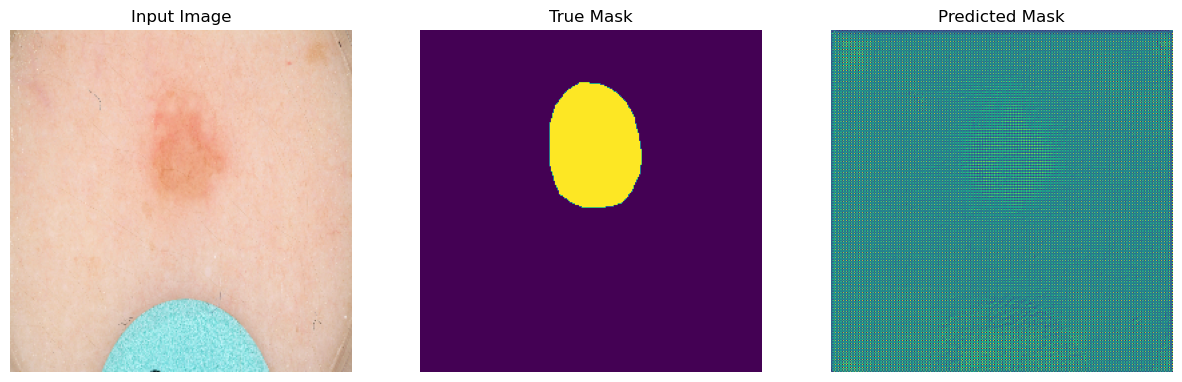

In [69]:
for images, masks in train_dataset.take(1):
    for img, mask in zip(images, masks):
        sample_image = img
        sample_mask = mask
        break
def visualize(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

def show_predictions(sample_image, sample_mask):
    pred_mask = model.predict(sample_image[tf.newaxis, ...])
    pred_mask = pred_mask.reshape(img_size[0],img_size[1],1)
    visualize([sample_image, sample_mask, pred_mask])
    
show_predictions(sample_image, sample_mask)

In [70]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 128, 128, 9  1841984     ['input_39[0][0]']               
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                         

After compiling the model using the dice loss and Adam optimizer, the model can be trained using the fit method of the compiled model. fit method trains the model on the training dataset by defining the number of epochs (EPOCHS) and steps per epoch (STEPS_PER_EPOCH).

In this example, an early stopping callback is also added to the training process to stop the training if the validation loss doesn't improve for 4 epochs. A custom callback DisplayCallback is also added to display the predictions on the sample image after every 3 epochs.



Epoch 1/15
42/42 [==============================] - 61s 1s/step - loss: 0.4414 - dice_coef: 0.5586 - binary_accuracy: 0.7589 - val_loss: 0.2314 - val_dice_coef: 0.7795 - val_binary_accuracy: 0.9064
Epoch 2/15
1/1 [==============================] - 0s 90ms/step


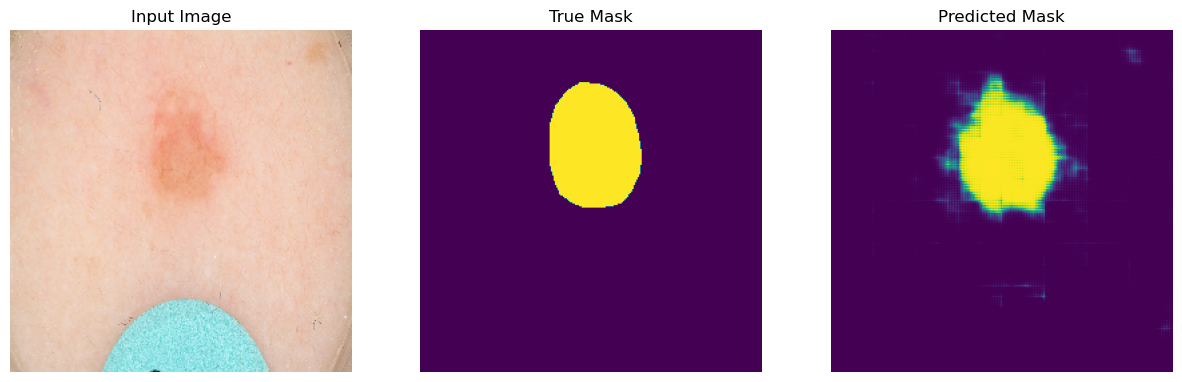

Epoch 3/15
42/42 [==============================] - 56s 1s/step - loss: 0.1471 - dice_coef: 0.8528 - binary_accuracy: 0.9318 - val_loss: 0.1543 - val_dice_coef: 0.8480 - val_binary_accuracy: 0.9320
Epoch 4/15
42/42 [==============================] - 55s 1s/step - loss: 0.1441 - dice_coef: 0.8565 - binary_accuracy: 0.9318 - val_loss: 0.1813 - val_dice_coef: 0.8199 - val_binary_accuracy: 0.9165
Epoch 5/15
1/1 [==============================] - 0s 85ms/step


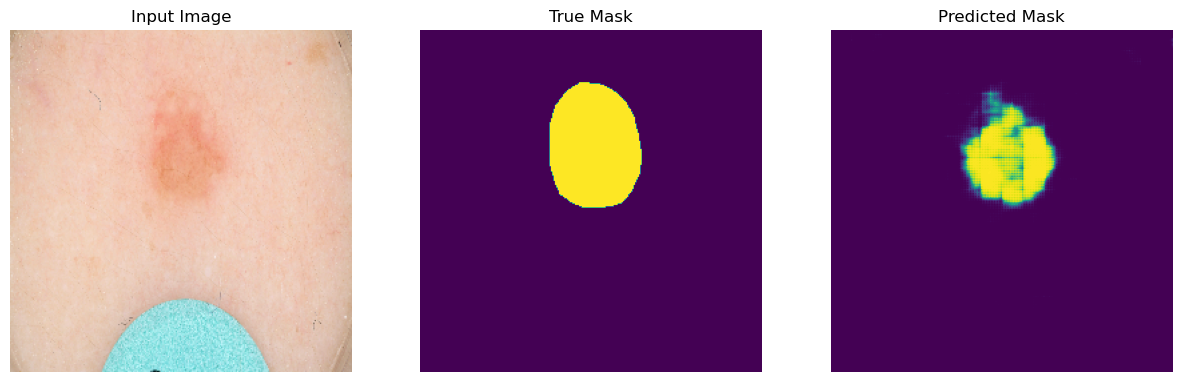

Epoch 6/15
42/42 [==============================] - 55s 1s/step - loss: 0.1330 - dice_coef: 0.8663 - binary_accuracy: 0.9311 - val_loss: 0.1562 - val_dice_coef: 0.8449 - val_binary_accuracy: 0.9267
Epoch 7/15
42/42 [==============================] - 57s 1s/step - loss: 0.1339 - dice_coef: 0.8663 - binary_accuracy: 0.9346 - val_loss: 0.1497 - val_dice_coef: 0.8518 - val_binary_accuracy: 0.9290
Epoch 8/15
1/1 [==============================] - 0s 92ms/step


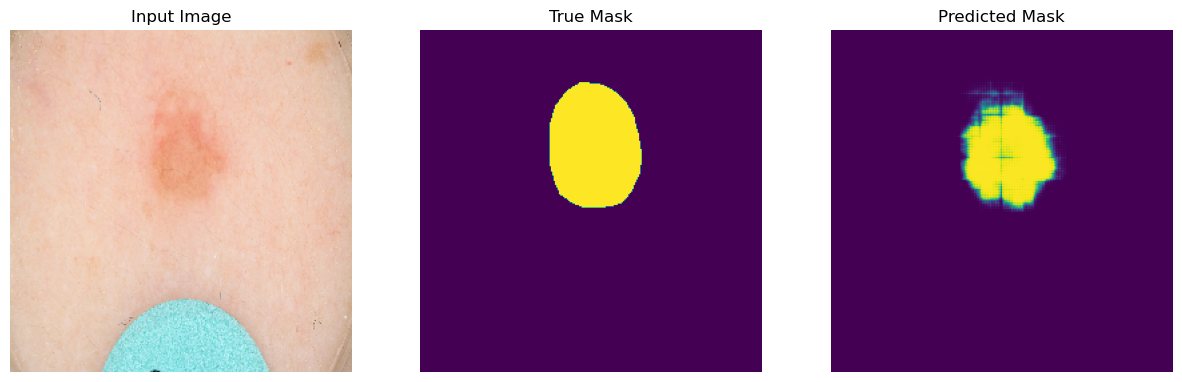

Epoch 9/15
42/42 [==============================] - 60s 1s/step - loss: 0.1280 - dice_coef: 0.8681 - binary_accuracy: 0.9356 - val_loss: 0.1452 - val_dice_coef: 0.8577 - val_binary_accuracy: 0.9307
Epoch 10/15
42/42 [==============================] - 59s 1s/step - loss: 0.1265 - dice_coef: 0.8732 - binary_accuracy: 0.9358 - val_loss: 0.1416 - val_dice_coef: 0.8601 - val_binary_accuracy: 0.9322
Epoch 11/15
1/1 [==============================] - 0s 96ms/step


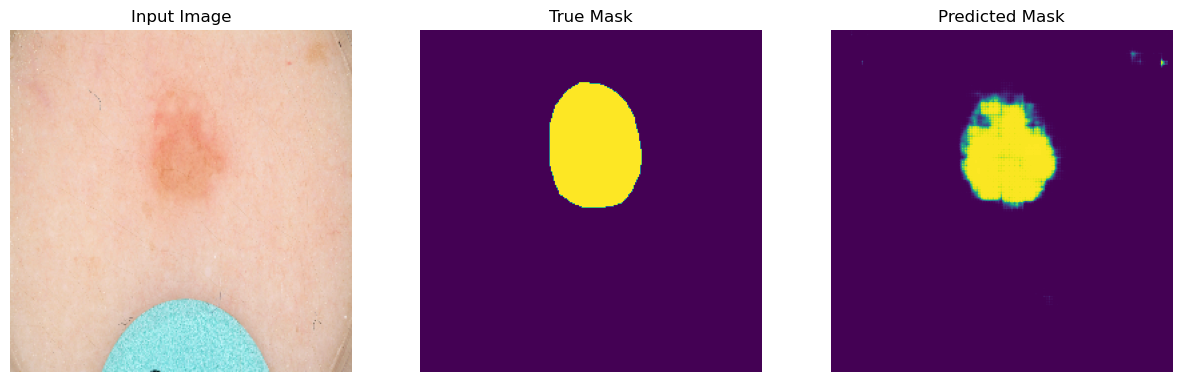

Epoch 12/15
42/42 [==============================] - 61s 1s/step - loss: 0.1206 - dice_coef: 0.8805 - binary_accuracy: 0.9365 - val_loss: 0.1478 - val_dice_coef: 0.8528 - val_binary_accuracy: 0.9276
Epoch 13/15
42/42 [==============================] - 62s 1s/step - loss: 0.1170 - dice_coef: 0.8786 - binary_accuracy: 0.9376 - val_loss: 0.1425 - val_dice_coef: 0.8602 - val_binary_accuracy: 0.9314
Epoch 14/15
42/42 [==============================] - 62s 1s/step - loss: 0.1293 - dice_coef: 0.8718 - binary_accuracy: 0.9352 - val_loss: 0.1957 - val_dice_coef: 0.8066 - val_binary_accuracy: 0.9097


In [71]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        if (epoch + 1) % 3 == 0:
            show_predictions(sample_image, sample_mask)
EPOCHS = 15
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                          callbacks=[DisplayCallback(), early_stop])

# Accuracy Result
**Original Unet Model** = 0.9332

**Soft-Attention Unet Model** = 0.9352